# Universe Expansion 
- Goal: Find the most accurate cosmological constant H possible, even if H is not a constant
- Structure:
    - Pt1. Statistics to calculate H (linear Hubble constant)
    - Pt2. Polynomial regression to find non-linear relationship with distance
    - Pt3. Galactic expansion rate over time animation
    - Pt4. Escaping from black holes animation

- Current:
    - expansion velocity is negligible for nearby galaxies dominated by gravity - exclude nearby galaxies from analysis
    - 3-degree log model doesn't scale well to low distances (i.e. inside black hole)
    - optimize linear regression to account for samples being mostly distributed at low distances
    - Other data sources
    - find radius of observable universe with dynamic H
    - Gravitational Waves: Gravitational wave events, especially those involving neutron star mergers, can provide an independent way to measure the expansion rate.
        - GW170817
        - Hubble Constant Calculation: Combining the luminosity distance and redshift allows for the calculation of the Hubble constant (H0), which relates distance and redshift to the expansion rate of the universe.
    - Add error bars to all viable plots


Assumptions: Unknown expansion rate

#### Cosmology says H increases with D - opposite of what we are seeing here

#### Summary:
- Pt 1
    - Calculate expansion velocity Vexp = Vcmb - Vpec
    - Calculate a variable H for all galaxies where H = Vexp/D
    - H vs D plot shows some relationship between H and D
    - Linear regression on H to find relationship between H and D, H_dynamic = aD+b - may not need
    - H_const = 71.16??? = mean of all galaxy's calculated H_dynamic values (with outlier galaxies removed)
    - Use H_dynamic to calculate Vexp_dynamic = H_dyn*D for all galaxies, plot shows smoother curve vs Vexp implying the model works better than constant H, which shows worse curve at high distances
- Pt 2
    - We see that constant H models these distances well, but since H scales with D, we need to find a model that scales well to high distances
    - H vs D trend appears asymptotal, implying polynomial model may not be ideal
    - Use linear, polynomial regression on Vexp vs D to see results
    - Set polynomial V vs D model = HD and solve for H
    - Find that logarithmic model suits best as we scale to high distances

- Pt 2 Modeling High Distances
    - Calculate past and future distances on the cosmic scale (of galaxies, observable universe, Hubble sphere) using constant H and linear H (using SGC coordinates in Mpc as opposed to pc) 
    - Animate expansion and contraction of galaxies
    
- Pt 3 Escaping a Black Hole
    - Calculate change in radius of particles orbiting inside a black hole due to expansion velocity
    - Animate the escape


### How the data was collected
Measuring Distance:
Standard Candles: Objects with known intrinsic brightness, like Type Ia supernovae and Cepheid variable stars, are used as "standard candles" to determine distance. By comparing their known intrinsic brightness to how bright they appear to us, astronomers can calculate their distance using the inverse square law of light.

Cosmic Distance Ladder: A method involving measuring distances to nearby galaxies using Cepheid variables and then extending those measurements to more distant galaxies by calibrating the brightness of Type Ia supernovae within them. 

Measuring Recession Velocity:
Standard candles:
Redshift: As light from distant galaxies travels through the expanding universe, its wavelengths are stretched, causing a shift towards the red end of the spectrum (redshift). The amount of redshift directly corresponds to the object's recession velocity.

Spectroscopy: Astronomers use spectroscopes to analyze the light from galaxies and identify specific spectral lines emitted by elements like hydrogen. By comparing the observed wavelengths of these lines to their known wavelengths in a laboratory, the amount of redshift can be calculated. 

# CF4 Galaxy Cluster Data

In [1]:
import pandas as pd
galaxy_df = pd.read_csv(r'CF4_Galactic_Group_Data.txt',sep=',',skiprows=[0,2,3,4],
                        header=0,index_col='pgc')
# galaxy_df.drop(['Hi','logH','fV'],axis=1,inplace=True) # dropping known Hubble parameters
galaxy_df.columns

Index(['DMzp', 'eDM', 'D', 'Vhel', 'Vls', 'Vcmb', 'fV', 'Vpds', 'Vpwf', 'Vpec',
       'Hi', 'logH', 'RA', 'DE', 'glon', 'glat', 'sgl', 'sgb', 'SGX', 'SGY',
       'SGZ'],
      dtype='object')

- Velocity km/s
- Distance Mpc

Galactic velocities were measured using Doppler redshifts; analyzing how shifted the wavelenghts of incoming IR signals are compared to what they should be in a rest frame. Galactic distances were measured using a variety of methods (...), one method of which is to use the known estimates of the Hubble constant H0 to calculate distance D from velocity V: D = V/H0. We took extra care to find data that does NOT use the latter method, as we are trying to calculate our own estimate for H0.

## Expansion velocity

In [2]:
# creating column of expansion velocity - observed (CMB) velocity minus peculiar velocity
galaxy_df['Vexp'] = galaxy_df['Vcmb'] - galaxy_df['Vpec']
c = 299792 # speed of light in km/s

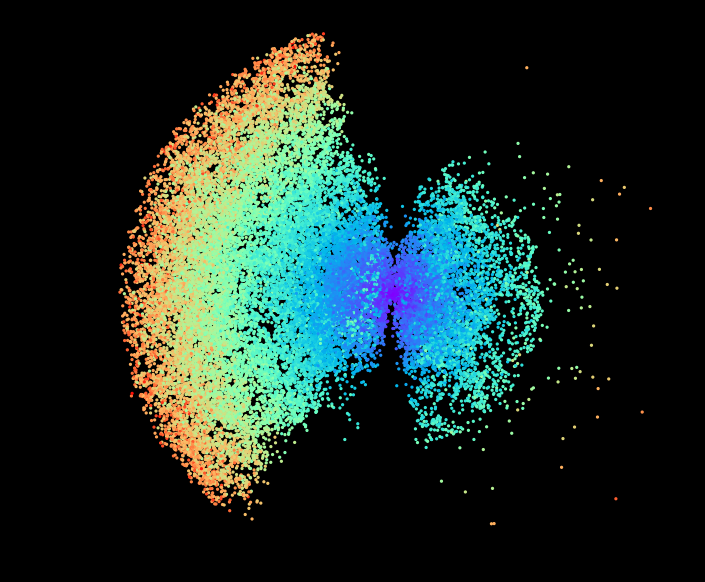

In [3]:
# visualizing velocity as a function of distance 
# using PCA to reduce 3 dimensional coordinates down to 2 variables

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
# %matplotlib tk 

pos = galaxy_df[['SGX','SGY','SGZ']].copy()
pca = PCA(n_components=2)

pos_reduced = pca.fit_transform(pos)
pos_reduced = pd.DataFrame(pos_reduced)

# plotting
plt.figure(figsize=[8,7])
plt.scatter(pos_reduced[0],pos_reduced[1],c=galaxy_df['Vexp'], cmap='rainbow',s=1.75)
plt.axis('equal')
plt.savefig('galaxies.png')
plt.show()

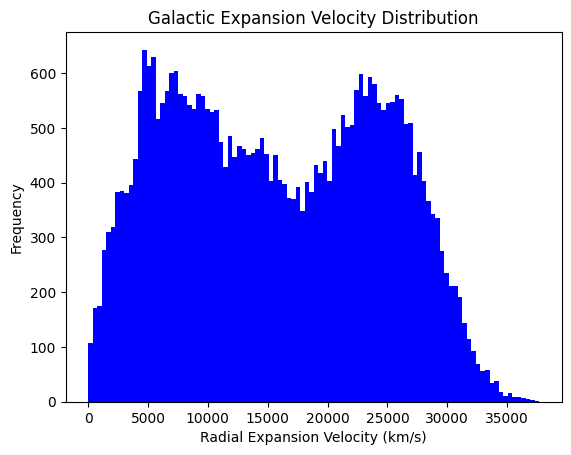

In [4]:
# plotting velocities
import matplotlib.pyplot as plt 
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

plt.hist(galaxy_df['Vexp'],bins=100,color='blue')
plt.xlabel('Radial Expansion Velocity (km/s)')
plt.ylabel('Frequency')
plt.title('Galactic Expansion Velocity Distribution')
plt.show()

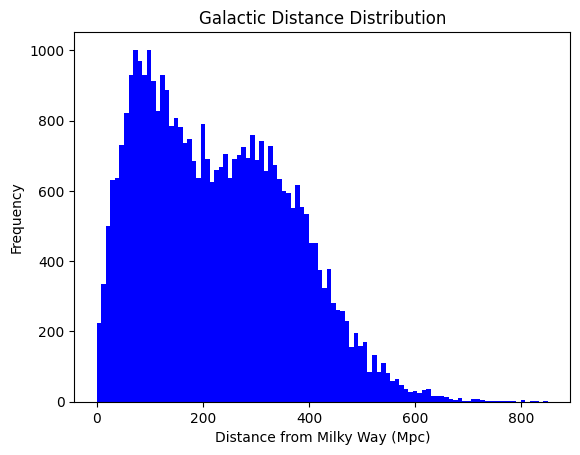

In [5]:
# plotting distance distribution
import matplotlib.pyplot as plt 
plt.hist(galaxy_df['D'],bins=100,color='blue')
plt.xlabel('Distance from Milky Way (Mpc)')
plt.ylabel('Frequency')
plt.title('Galactic Distance Distribution')
plt.show()

Distance distribution is highly skewed towards lower distances. We will have to take this sample imbalance into account when applying a regression model.

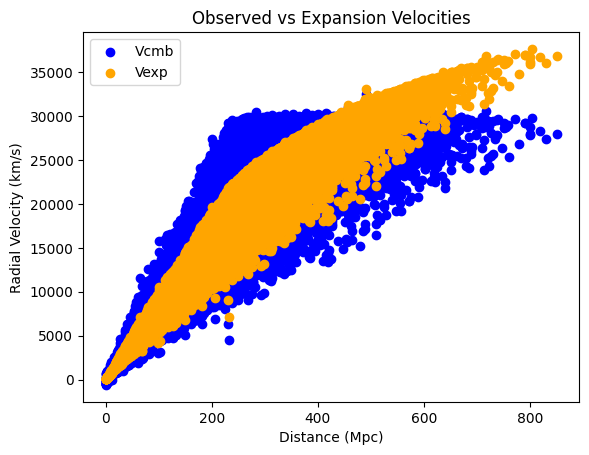

In [6]:
# comparing velocity to distance

plt.scatter(galaxy_df['D'],galaxy_df['Vcmb'],label='Vcmb',color='blue')
plt.scatter(galaxy_df['D'],galaxy_df['Vexp'],label='Vexp',color='orange')
plt.ylabel('Radial Velocity (km/s)')
plt.xlabel('Distance (Mpc)')
plt.title('Observed vs Expansion Velocities')
plt.legend()
plt.show()

### Calculating ratio of velocity to distance

In [7]:
# calculating H values using H = Vexp/D
galaxy_df['H'] = galaxy_df['Vexp']/galaxy_df['D']
print(galaxy_df['H'].mean())

71.8604535703846


### Dropping outliers

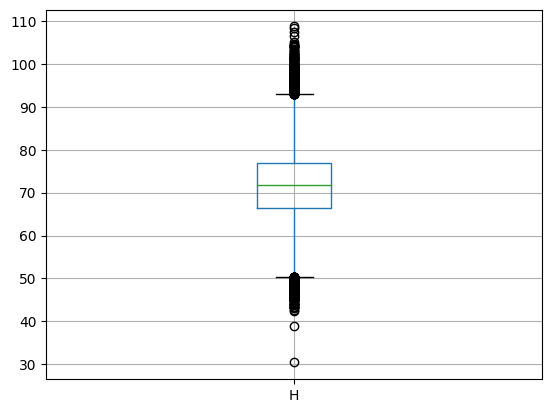

(37342, 23)

In [8]:
# dropping outliers: galaxies that are traveling faster / slower than usual for their distance.

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

galaxy_df[['H']].boxplot()
plt.show()

threshold = 1.5
Q1 = galaxy_df['H'].quantile(0.25)
Q3 = galaxy_df['H'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
galaxy_df = galaxy_df[(galaxy_df['H'] >= lower_bound) & (galaxy_df['H'] <= upper_bound)]

# dropping D outliers for now - low end skewing log model results to negative values
threshold = 1.5
Q1 = galaxy_df['D'].quantile(0.25)
Q3 = galaxy_df['D'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
galaxy_df = galaxy_df[(galaxy_df['D'] >= lower_bound) & (galaxy_df['D'] <= upper_bound)]
galaxy_df.shape

The peculiar velocity of each galaxy cluster, resulting from local gravitational effects and unrelated to universal expansion, has no impact on our model and can be treated as random noise. We created a new data column (Vexp) of the galaxies' peculiar velocities (Vpec) subtracted from their velocities relative to the cosmic background radiation (Vcmb). 

This new column represents each galaxy's velocity due to universal expansion, or their radial expansion velocities. We can see the distribution of radial expansion velocities has less variability than the distribution of velocities relative to the cosmic background.

We use PCA to reduce each galaxy cluster's 3 spatial coordinates down to 2 dimensions in order to visualize the increasing velocity with distance.

## Linear regression
- figure out sample weights, or some other way to correct for low distance sample bias
    - huber white estimator?

In [9]:
# linear regression
# V = mD + b, assuming b = 0 from V = HD

import statsmodels.api as sm # for huber-white estimator
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X = galaxy_df[['D']]
y = galaxy_df[['Vexp']]

# # calculating weights for weighted regression, since sample distribution is highly biased to low distances
# mean = np.mean(X)
# variances = []
# for value in X.values:
#     variance = (value - mean) ** 2
# weights = (X/variance.flatten()).values.flatten()
galaxy_df['distance_bins'] = pd.cut(galaxy_df['D'], bins=6, labels=False)
distance_bins = galaxy_df['distance_bins'].values
X_train, X_test, y_train, y_test_lin = train_test_split(X,y,test_size=0.2,random_state=5,stratify = distance_bins)

lin_model = Ridge(fit_intercept=False)
lin_model.fit(X_train,y_train) #,sample_weight=w_train)

predictions_lin = lin_model.predict(X_test)

print('Training score:',lin_model.score(X_train,y_train))
print('Test score:',lin_model.score(X_test,y_test_lin))
print(lin_model.coef_[0])
print(lin_model.intercept_)

rmse = mean_squared_error(y_test_lin, lin_model.predict(X_test), squared=False)
print(f"RMSE: {round(rmse)}")

Training score: 0.9422257854808619
Test score: 0.942354477516191
[67.38639165]
0.0
RMSE: 2077


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


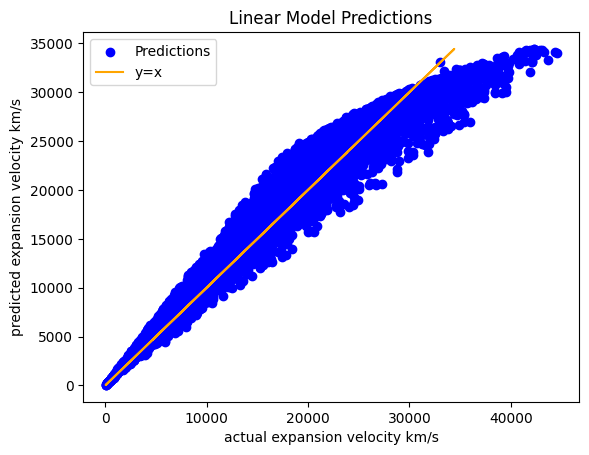

In [10]:
# plot V = HD line overlay

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

plt.scatter(predictions_lin,y_test_lin,color='blue',label='Predictions')
plt.plot(y_test_lin,y_test_lin,color='orange',label='y=x')
plt.legend()
plt.xlabel('actual expansion velocity km/s')
plt.ylabel('predicted expansion velocity km/s')
plt.title('Linear Model Predictions')
plt.show()

The relationship defined by Hubble's Law, V = HD, defines the expansion of the universe for any galaxy with velocity V and distance D. Using a linear regression model of the form y = mx + 0, we are able to solve for our coefficient H. According to our model, H = 66.9 km/s/Mpc, below NASA's estimated 71.0 ± 2.8 km/s/Mpc. It may be low due to having more samples in the lower range of distances. The model was trained on data ranging from 0.1 to 850.7 MPc. 

Our initial model's predictions compared to actual Vexp values has an R^2 of 0.93 and an RMSE of 2277.

We can see from our plot of predictions vs actuals that at high distances, the rate at which the galaxies are speeding up begins to decrease when compared to our model. Given that our model is of the form V = H*D, this rate change implies that H is getting smaller as distance increases.

## H const = Lin model slope (or mean H calculated below??)

In [11]:
H_const = lin_model.coef_[0][0] # average hubble constant
print(f'Constant H_const: {H_const} ???') 

Constant H_const: 67.38639165104324 ???


## Dynamic H

In [12]:
# variable H as distances change

# average calculated H value
print('Average H:',galaxy_df['H'].mean())

# grouping by 100 megaparsec intervals to see how H changes with distance
galaxy_df['distance_cluster'] = 0  # Initialize the new column
galaxy_df.loc[galaxy_df['D'] <= 100, 'distance_cluster'] = 0 
galaxy_df.loc[(galaxy_df['D'] > 100) & (galaxy_df['D'] <= 200), 'distance_cluster'] = 1
galaxy_df.loc[(galaxy_df['D'] > 200) & (galaxy_df['D'] <= 300), 'distance_cluster'] = 2
galaxy_df.loc[(galaxy_df['D'] > 300) & (galaxy_df['D'] <= 400), 'distance_cluster'] = 3
galaxy_df.loc[(galaxy_df['D'] > 400) & (galaxy_df['D'] <= 500), 'distance_cluster'] = 4
galaxy_df.loc[(galaxy_df['D'] > 500) & (galaxy_df['D'] <= 600), 'distance_cluster'] = 5
galaxy_df.loc[(galaxy_df['D'] > 600) & (galaxy_df['D'] <= 700), 'distance_cluster'] = 6
galaxy_df.loc[(galaxy_df['D'] > 700) & (galaxy_df['D'] <= 800), 'distance_cluster'] = 7
galaxy_df.loc[galaxy_df['D'] > 800, 'distance_cluster'] = 8
grouped_df = galaxy_df.groupby('distance_cluster')[['D','Vexp']].mean()
grouped_df['H'] = grouped_df['Vexp']/grouped_df['D']
grouped_df

Average H: 71.7184294984146


,D,Vexp,H
distance_cluster,,,
0,59.952337,4501.836462,75.090258
1,147.230568,10850.228340,73.695487
2,250.484555,18310.066193,73.098584
3,346.941622,24078.521856,69.402229
4,440.813237,27956.260405,63.419739
5,536.527983,30867.797180,57.532502
6,625.858462,33511.523077,53.544891


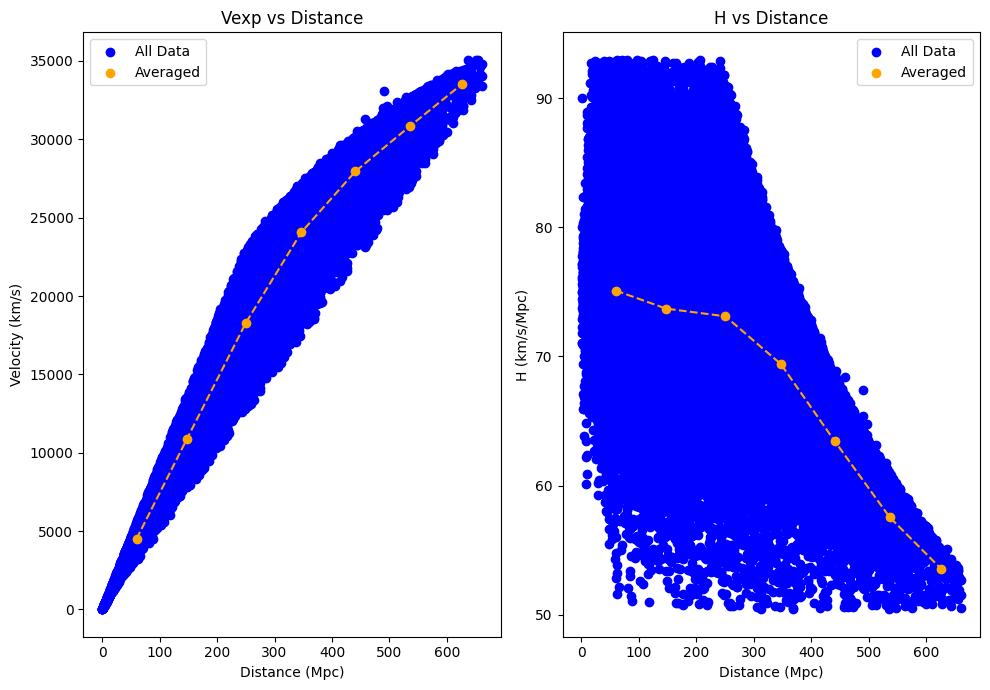

In [13]:
# plotting V and H over distance

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

fig,[ax1,ax2] = plt.subplots(1,2,figsize=[10,7])
# plotting all Vexp vs distance
ax1.scatter(galaxy_df['D'],galaxy_df['Vexp'],color='blue',label='All Data')
ax1.set_title('Vexp vs Distance')
ax1.set_xlabel('Distance (Mpc)')
ax1.set_ylabel('Velocity (km/s)')

# plotting grouped Vexp vs distance
ax1.scatter(grouped_df['D'],grouped_df['Vexp'],color='orange',label='Averaged')
ax1.plot(grouped_df['D'],grouped_df['Vexp'],color='orange',linestyle='--')
ax1.legend()

# plotting all H vs distance
ax2.scatter(galaxy_df['D'],galaxy_df['H'],color='blue',label='All Data')
ax2.set_title('H vs Distance')
ax2.set_xlabel('Distance (Mpc)')
ax2.set_ylabel('H (km/s/Mpc)')

# plotting grouped H vs distance
ax2.scatter(grouped_df['D'],grouped_df['H'],color='orange',label='Averaged')
ax2.plot(grouped_df['D'],grouped_df['H'],color='orange',linestyle='--')
ax2.legend()

plt.tight_layout()
plt.show()

## Calculating velocities from H_const

In [14]:
# building dynamic H column using linear regression output to determine what velocities should look like

# calculating dynamic velocity using V = H_dyn * D
galaxy_df['H_const_Vexp'] = lin_model.predict(galaxy_df['D'].values.reshape(-1,1))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


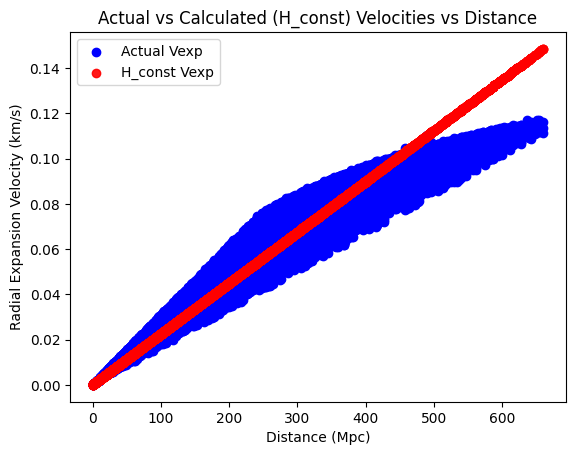

In [15]:
# plotting new dynamic velocities compared to measured velocities - much smoother curve vs distance
plt.scatter(galaxy_df['D'],galaxy_df['Vexp']/c,color='blue',label='Actual Vexp')
plt.scatter(galaxy_df['D'],galaxy_df['H_const_Vexp']/c,color='red',label='H_const Vexp',alpha=0.9)
plt.legend()
plt.title('Actual vs Calculated (H_const) Velocities vs Distance')
plt.ylabel('Radial Expansion Velocity (km/s)')
plt.xlabel('Distance (Mpc)')
plt.show()

## 2-Degree Polynomial Regression

In [16]:
# V = H1D^2 + H2D
# second degree polynomial seems to account for dynamic H values
# ideal number of bins to split data into: 6

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

galaxy_df['distance_bins'] = pd.cut(galaxy_df['D'], bins=6, labels=False)

# running model on measured velocities
X = galaxy_df[['D']]
y = galaxy_df[['Vexp']]
# y = np.log(y)

X_train, X_test, y_train, y_test_poly = train_test_split(X,y,test_size=0.2,random_state=5,stratify=galaxy_df['distance_bins'])

poly = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)

model_poly = LinearRegression(fit_intercept=False)
model_poly.fit(x_poly,y_train)

poly_prediction_df = y_test_poly.copy()
poly_prediction_df['predicted_Vexp'] = model_poly.predict(x_test_poly)

print('Training score:',model_poly.score(x_poly,y_train))
print('Test score:',model_poly.score(x_test_poly,y_test_poly))

print(model_poly.coef_)
print(model_poly.intercept_)


Training score: 0.9691819346590094
Test score: 0.9689845150614607
[[ 8.40026466e+01 -4.58409498e-02]]
0.0


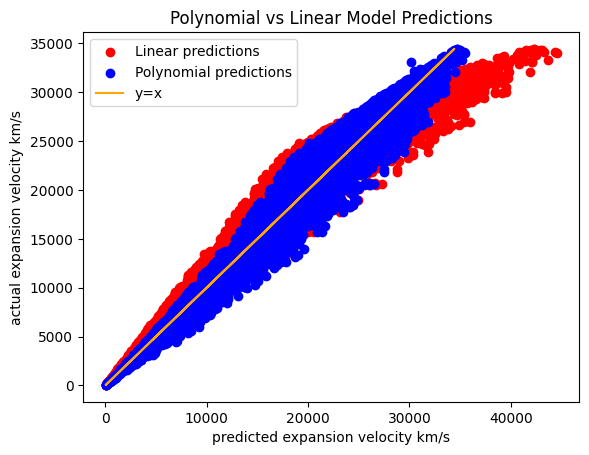

In [17]:
# plotting polynomial predictions with linear predictions overlayed

plt.scatter(predictions_lin,y_test_lin,color='red',label='Linear predictions',alpha=1)
plt.scatter(poly_prediction_df['predicted_Vexp'],poly_prediction_df['Vexp'],color='blue',
            label='Polynomial predictions')
plt.plot(y_test_poly,y_test_poly,color='orange',label='y=x')

plt.xlabel('predicted expansion velocity km/s')
plt.ylabel('actual expansion velocity km/s')
plt.title('Polynomial vs Linear Model Predictions')
plt.legend()
plt.show() 

We used a linear regression model to find a constant H value and plot its predictions.

The result is a line through the data that fits well at low distances. Accounting for lower distances having high sample distribution may correct the slope.

2-degree polynomial regression seems to model our velocity vs distance well, implying a linear relationship between H and D. However, polynomials trend towards ±infinity at extreme values which contradicts our assumptions about expansion. 

In [18]:
poly.transform(np.array(40.7).reshape(-1,1))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[  40.7 , 1656.49]])

In [19]:
model_poly.predict(poly.transform(np.array(40.7).reshape(-1,1)))/c

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[0.01115097]])

## Calculating Velocities from Polynomial H

In [20]:
# # finding average universe expansion constant from average dynamic_H
galaxy_df['H_poly_Vexp'] = model_poly.predict(poly.transform(galaxy_df['D'].values.reshape(-1,1)))
H_poly_avg = (galaxy_df['H_poly_Vexp']/galaxy_df['D']).mean()
print('Average universal expansion constant:',H_poly_avg,'km/s/Mpc')

Average universal expansion constant: 73.52879521449687 km/s/Mpc


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [21]:
# finding error margin
galaxy_df['error_d'] = np.exp(galaxy_df['eDM'])
galaxy_df['error_d'].mean()

1.602176807174536

When comparing the predictions of our second-degree polynomial regression model, the predictions seem to stay consistent with actuals rather than diverging at higher distances as shown in the linear model.

## Logarithmic relationship - trend towards a value
- does not scale well to low distances (inside black hole) - i.e. log(distance<1) = negative

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import numpy as np
# best model with degree = 3, intercept = False


# running model on measured velocities
X = galaxy_df[['D']].copy()
y = galaxy_df[['Vexp']].copy() # removing noise by using dynamic_Vexp - assuming constant H at low distances

# logarthmic relationship y = lnx + b
X = np.log(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=5)

poly = PolynomialFeatures(degree=3,include_bias=False)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

log_model = LinearRegression(fit_intercept=True)
log_model.fit(X_train,y_train)

log_prediction_df = y_test.copy()
log_prediction_df['predicted_Vexp'] = log_model.predict(X_test)
log_prediction_df = pd.merge(log_prediction_df,galaxy_df[['D']],left_index=True, 
                                   right_index=True, how='left')

print('executed')
print('Train score:',log_model.score(X_train,y_train))
print('Test score:',log_model.score(X_test,y_test))
print('RMSE:',root_mean_squared_error(log_model.predict(X_test),y_test))
print(log_model.coef_)
print(log_model.intercept_)

executed
Train score: 0.968454019719559
Test score: 0.9677551565641167
RMSE: 1548.940670308475
[[ 2078.01248798 -1841.39736607   363.79190185]]
[1625.54463506]


- V = aln(D) + b
- V = a1ln(D) + a2ln(D**2) + a3ln(D**3)
- dx/dt = (a1*ln(x) + a2*ln(x^2) + a3*ln(x^3)
- first-order nonlinear ordinary differential equation with no easy solution
    - plug in values to find analytical relationship?

In [23]:
# log_prediction_df

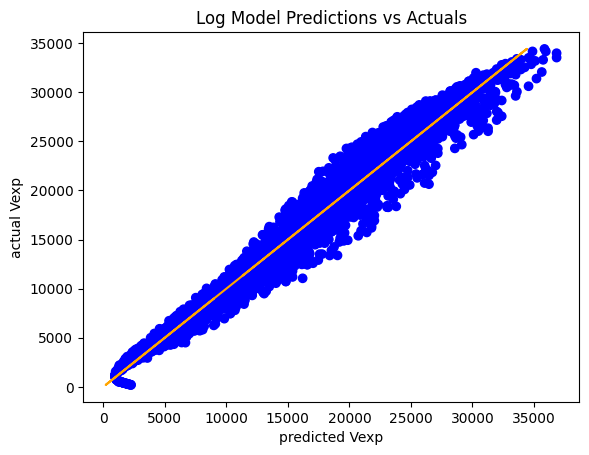

In [24]:
# plotting log predictions vs actuals

# changing colors if value is negative
colors = []
for val in log_prediction_df['predicted_Vexp'].values:
    if val < 0:
        colors += ['red']
    else:
        colors += ['blue']

# colors = ['red' if val < 0 else 'blue' for val in y]

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.scatter(log_prediction_df['predicted_Vexp'],log_prediction_df['Vexp'],c=colors)
plt.plot(log_prediction_df['Vexp'],log_prediction_df['Vexp'],color='orange')
plt.xlabel('predicted Vexp')
plt.ylabel('actual Vexp')
plt.title('Log Model Predictions vs Actuals')
plt.show()

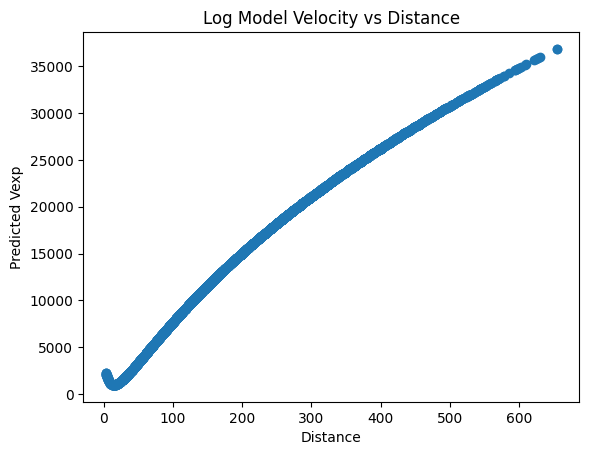

In [25]:
# shape of log function - distances vs velocities
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
# plt.scatter(log_prediction_df['predicted_Vexp'],log_prediction_df['Vexp'])
plt.scatter(log_prediction_df['D'],log_prediction_df['predicted_Vexp'])
plt.xlabel('Distance')
plt.ylabel('Predicted Vexp')
plt.title('Log Model Velocity vs Distance')
plt.show()

In [26]:
poly.transform(np.array(np.log(40.7)).reshape(-1,1))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[ 3.70622809, 13.73612667, 50.90921856]])

In [27]:
log_model.predict(poly.transform(np.array(np.log(40.7)).reshape(-1,1)))/c

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[0.00851866]])

#### Predictions vs Cosmic Actuals

In [28]:
log_model.coef_

array([[ 2078.01248798, -1841.39736607,   363.79190185]])

In [29]:
poly.transform(np.array(np.log(1e-9)).reshape(-1,1))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[  -20.72326584,   429.45374695, -8899.68416269]])

In [30]:
# # # predictions of model vs high distances calculated with constant H
# # log_model.predict(future_distance_df.iloc[:,-1].values.reshape(-1,1))
# cosmic_prediction_df = pd.DataFrame(log_model.predict(poly.transform(np.log(future_distance_df.iloc[:,-1]).values.reshape(-1,1)))
#                                    ,columns=['predicted velocity'])
# cosmic_prediction_df['actuals'] = future_velmag_df.iloc[:,1].values*c
# print(log_model.predict(poly.transform(np.array(np.log(1e-9)).reshape(-1,1))))
# cosmic_prediction_df

NameError: name 'future_distance_df' is not defined

In [ ]:
# poly_prediction_df.head()

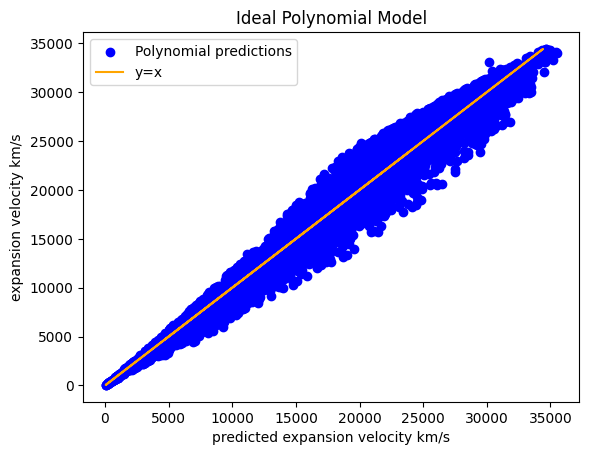

In [31]:
# plotting polynomial predictions with linear predictions overlayed

plt.scatter(poly_prediction_df['predicted_Vexp'],poly_prediction_df['Vexp'],color='blue',
            label='Polynomial predictions')
plt.plot(y_test_poly,y_test_poly,color='orange',label='y=x')

plt.xlabel('predicted expansion velocity km/s')
plt.ylabel('expansion velocity km/s')
plt.title('Ideal Polynomial Model')
plt.legend()
plt.show() 

## Calculating Distance Over Time (Cosmic Scale)

- calculate initial radius of observable universe for dynamic H


 
 ** from google:
Yes, at sufficiently large distances, Hubble's Law indicates that galaxies appear to be receding from us at speeds exceeding the speed of light. However, this doesn't mean that objects are actually traveling faster than light through space. Instead, it's the expansion of space itself between us and those distant galaxies that causes their apparent recession velocity to exceed the speed of light. 

For the edge of the current observable universe (radius 14.25e3 Mpc), following V = HD (using H = H_const), we see that it is currently expanding at roughly 3.38 times the speed of light c.

Note:
The distance, in all directions, at which galaxies' expansion velocity expeeds the speed of light is known as the Hubble sphere. The Hubble sphere, according to our constant H value, is found from D_hs = c/H.

- To make our distance over time calculations more accurate, we would need a model for the peculiar velocities, which depends on a variety of factors.

In [32]:
# calculating initial position and velocity components
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

H = H_const

# rescaling distances
galaxy_df['SGX_scaled'] = galaxy_df['SGX']/1.75
galaxy_df['SGY_scaled'] = galaxy_df['SGY']/1.75
galaxy_df['SGZ_scaled'] = galaxy_df['SGZ']/1.75

# initial position and distance for random sample of galaxies
pos_0 = pd.DataFrame(galaxy_df[['SGX_scaled','SGY_scaled','SGZ_scaled']].sample(2500,random_state=5).copy())
pos_0['dist'] = np.sqrt(pos_0.iloc[:,0]**2 + pos_0.iloc[:,1]**2 + 
                                      pos_0.iloc[:,2]**2)

# # finding initial velocity magnitude
mag = pos_0['dist'].values.reshape(-1,1)
vel_0 = H_const * mag # H*D
dyn_vel_0 = (log_model.predict(poly.transform(np.log(mag).reshape(-1,1)))) # H*D = model predictions

# # finding initial velocity direction
position_vector = pos_0[['SGX_scaled','SGY_scaled','SGZ_scaled']].copy()

direction = position_vector / mag
vel_vector = direction * vel_0
dyn_vel_vector = direction * dyn_vel_0

pos_0['Vx'] = vel_vector.iloc[:,0]
pos_0['Vy'] = vel_vector.iloc[:,1]
pos_0['Vz'] = vel_vector.iloc[:,2]
pos_0['dyn_Vx'] = dyn_vel_vector.iloc[:,0]
pos_0['dyn_Vy'] = dyn_vel_vector.iloc[:,1]
pos_0['dyn_Vz'] = dyn_vel_vector.iloc[:,2]

pos_0['velmag'] = np.sqrt(pos_0['Vx']**2 + pos_0['Vy']**2 + pos_0['Vz']**2)
pos_0['dyn_velmag'] = np.sqrt(pos_0['dyn_Vx']**2 + pos_0['dyn_Vy']**2 + pos_0['dyn_Vz']**2)
print('initial value shape:',pos_0.shape)

initial value shape: (2500, 12)


In [33]:
%%time
# building arrays
# can optimize performance:
    # build one dataframe instead of future & past, from -t to t

warnings.filterwarnings("ignore")
c = 299792 # speed of light in km/s
H = H_const
km_in_Mpc = 3.086e+19
secs_in_yr = 31536000
unv_age = 1/(H_const/km_in_Mpc)/secs_in_yr # universe age: 1/H, from V = HD and V = D/t
G = 6.67e-11 # gravitational constant
m_solar = 1.989e+30 # kg
t0 = 20e9
dt = t0/200 # timestep, as a multiple of t0 to have final t = t0
time = np.arange(0,t0,dt) # create lots of values when ready to make accurate measurement
# time = time[1:] # D0 accounts for t=0

# radius of observable universe
# constant H
obs_rad_init = c/H_const # Mpc - hubble sphere is approximation for rad of universe. find better?

# calculating points for Hubble sphere
D_hs = c/H # V = HD, where V = c
radius = D_hs
num_points = 15 # Adjust for desired density
points = []
phi = np.linspace(0, np.pi, num_points)  # Latitude angles
theta = np.linspace(0, 2 * np.pi, num_points)  # Longitude angles
for p in phi:
   for t in theta:
       x = radius * np.sin(p) * np.cos(t)
       y = radius * np.sin(p) * np.sin(t)
       z = radius * np.cos(p)
       points.append([x, y, z])
points_hs = np.array(points)

# initializing dataframes of initial positions
future_position_df = pos_0[['SGX_scaled','SGY_scaled','SGZ_scaled']].copy()
future_position_df['pos0'] = list(zip(future_position_df['SGX_scaled'],future_position_df['SGY_scaled'],
                                      future_position_df['SGZ_scaled']))
future_position_df.drop(['SGX_scaled','SGY_scaled','SGZ_scaled'],axis=1,inplace=True)
future_position_df = pd.DataFrame(future_position_df.apply(lambda row: [np.array(x) if isinstance(x, tuple) 
                                                                        else x for x in row][0], axis=1))
dyn_future_position_df = future_position_df.copy()

past_position_df = future_position_df.copy()
dyn_past_position_df = dyn_future_position_df.copy()

# initializing dataframes of initial velocities
future_velocity_df = pos_0[['Vx','Vy','Vz']].copy()
future_velocity_df['vel0'] = list(zip(future_velocity_df['Vx'],future_velocity_df['Vy'],future_velocity_df['Vz']))
future_velocity_df.drop(['Vx','Vy','Vz'],axis=1,inplace=True)
future_velocity_df = pd.DataFrame(future_velocity_df.apply(lambda row: [np.array(x) if isinstance(x, tuple) 
                                                                        else x for x in row][0], axis=1))

dyn_future_velocity_df = pos_0[['dyn_Vx','dyn_Vy','dyn_Vz']].copy()
dyn_future_velocity_df['vel0'] = list(zip(dyn_future_velocity_df['dyn_Vx'],dyn_future_velocity_df['dyn_Vy']
                                          ,dyn_future_velocity_df['dyn_Vz']))
dyn_future_velocity_df.drop(['dyn_Vx','dyn_Vy','dyn_Vz'],axis=1,inplace=True)
dyn_future_velocity_df = pd.DataFrame(dyn_future_velocity_df.apply(lambda row: [np.array(x) if 
                                        isinstance(x, tuple) else x for x in row][0], axis=1))

past_velocity_df = future_velocity_df.copy()
dyn_past_velocity_df = dyn_future_velocity_df.copy()

# initializing dataframe of distances (from positions)
future_distance_df = pos_0[['dist']].copy()
future_distance_df.rename(columns={'dist':0},inplace=True)
dyn_future_distance_df = future_distance_df.copy()

past_distance_df = future_distance_df.copy()
dyn_past_distance_df = past_distance_df.copy()

# initializing observable universe radius dataframe - initial radius
# need to update, still using that bitch ass equation
radius = obs_rad_init # V = HD 
num_points = 30 
points = []
phi = np.linspace(0, np.pi, num_points)  # latitude angles
theta = np.linspace(0, 2 * np.pi, num_points)  # longitude angles
for p in phi:
   for ang in theta:
       x = radius * np.sin(p) * np.cos(ang)
       y = radius * np.sin(p) * np.sin(ang)
       z = radius * np.cos(p)
       points.append([x, y, z])
future_points_obs = np.array(points)
future_obs_radius_df = pd.DataFrame(future_points_obs)
future_obs_radius_df['coords'] = list(zip(future_obs_radius_df[0],future_obs_radius_df[1],
                                          future_obs_radius_df[2]))
future_obs_radius_df.drop([0,1,2],axis=1,inplace=True)
future_obs_radius_df = pd.DataFrame(future_obs_radius_df.apply(lambda row: [np.array(x) if isinstance(x, tuple) 
                                                                        else x for x in row][0], axis=1))
past_obs_radius_df = future_obs_radius_df.copy()
dyn_future_obs_radius_df = future_obs_radius_df.copy()
dyn_past_obs_radius_df = future_obs_radius_df.copy()

# gravity dataframe initialization
m_avg = galaxy_df.shape[0]*m_solar*(1e7 + 1e12)/2 # avg mass of all galaxies
future_gamma = 1/(np.emath.sqrt(1-((future_distance_df.iloc[:,0])**2/c**2)))
future_m_adj = m_avg * future_gamma # adjusting for relativistic mass
future_gravity_df = pd.DataFrame(G*future_m_adj/(future_distance_df.iloc[:,0]*km_in_Mpc*1e3)**2)
past_gravity_df = future_gravity_df.copy()

# updating dataframes
first_iter = True
print('0%')
for t in time[1:]:
    # print(t)
    if t == time[round((len(time)-1)/4)]:
        print('25%')
    if t == time[round((len(time)-1)/2)]:
        print('50%')
    if t == time[round((len(time)-1)/1.33)]:
        print('75%')
    # D = D0 + V0dt 
    # D = D0 - V0dt for negative times
    if first_iter == True:
        # const H
        future_position_df[t] = (future_position_df.iloc[:,0].values + 
                                (future_velocity_df.iloc[:,0].values*dt*secs_in_yr)/km_in_Mpc)
        past_position_df[t] = (past_position_df.iloc[:,0].values - 
                                (past_velocity_df.iloc[:,0].values*dt*secs_in_yr)/km_in_Mpc)
        # dynamic H
        dyn_future_position_df[t] = (dyn_future_position_df.iloc[:,0].values + 
                                     (dyn_future_velocity_df.iloc[:,0].values*dt*secs_in_yr)/km_in_Mpc)
        dyn_past_position_df[t] = (dyn_past_position_df.iloc[:,0].values - 
                                    (dyn_past_velocity_df.iloc[:,0].values*dt*secs_in_yr)/km_in_Mpc)
        # initial values for observable universe 
        future_rad_init = obs_rad_init
        past_rad_init = obs_rad_init
        dyn_future_rad_init = obs_rad_init
        dyn_past_rad_init = obs_rad_init
        future_vel_init = H_const*future_rad_init
        past_vel_init = H_const*past_rad_init
        dyn_future_vel_init = log_model.predict(poly.transform(np.log(dyn_future_rad_init).reshape(-1,1)))[0][0]
        dyn_past_vel_init = log_model.predict(poly.transform(np.log(dyn_past_rad_init).reshape(-1,1)))[0][0]
        # dyn_future_vel_init = et_model.predict(np.array(dyn_future_rad_init).reshape(1,-1))[0]
        # dyn_past_vel_init = et_model.predict(np.array(dyn_past_rad_init).reshape(1,-1))[0]

    else:
        # const H
        future_position_df[t] = (future_position_df[t-dt].values + 
                                (future_velocity_df[t-dt].values*dt*secs_in_yr)/km_in_Mpc)
        past_position_df[t] = (past_position_df[t-dt].values - 
                                (past_velocity_df[t-dt].values*dt*secs_in_yr)/km_in_Mpc)
        # dynamic H
        dyn_future_position_df[t] = (dyn_future_position_df[t-dt].values + 
                                    (dyn_future_velocity_df[t-dt].values*dt*secs_in_yr)/km_in_Mpc)
        dyn_past_position_df[t] = (dyn_past_position_df[t-dt].values - 
                                    (dyn_past_velocity_df[t-dt].values*dt*secs_in_yr)/km_in_Mpc)
    
    # distance = sqrt(x**2+y**2+z**2)
    future_distance_df[t] = future_position_df[t].apply(lambda x: np.linalg.norm(x))
    past_distance_df[t] = past_position_df[t].apply(lambda x: np.linalg.norm(x))
    dyn_future_distance_df[t] = dyn_future_position_df[t].apply(lambda x: np.linalg.norm(x))
    dyn_past_distance_df[t] = dyn_past_position_df[t].apply(lambda x: np.linalg.norm(x))
    
    # direction = position vector / position magnitude (distance)
    future_direction = future_position_df[t].values/future_distance_df[t].values
    past_direction = past_position_df[t].values/past_distance_df[t].values
    dyn_future_direction = dyn_future_position_df[t].values/dyn_future_distance_df[t].values
    dyn_past_direction = dyn_past_position_df[t].values/dyn_past_distance_df[t].values
    
    
    # V = HD (constant H)
    future_velocity_df[t] = H * future_distance_df[t].values * future_direction
    past_velocity_df[t] = H * past_distance_df[t].values * past_direction
    # V = (aD+b)D (dynamic H)
    dyn_future_velocity_df[t] = (log_model.predict(poly.transform(np.log(dyn_future_distance_df[t]).values.reshape(-1,1)))).flatten() * dyn_future_direction
    dyn_past_velocity_df[t] = (log_model.predict(poly.transform(np.log(dyn_past_distance_df[t]).values.reshape(-1,1)))).flatten() * dyn_past_direction
    # dyn_future_velocity_df[t] = (et_model.predict(dyn_future_distance_df[t].values.reshape(-1,1))).flatten() * dyn_future_direction
    # dyn_past_velocity_df[t] = (et_model.predict(dyn_past_distance_df[t].values.reshape(-1,1))).flatten() * dyn_past_direction

    
    # radius of observable universe
    # V0 = H*future_rad_init
    # R = R0 + V0dt
    # constant H 
    future_radius = future_rad_init + future_vel_init*dt*secs_in_yr/km_in_Mpc
    future_rad_init = future_radius
    future_vel_init = H_const*future_rad_init
    past_radius = past_rad_init - past_vel_init*dt*secs_in_yr/km_in_Mpc
    past_rad_init = past_radius
    past_vel_init = H_const*past_rad_init
    future_points = []
    past_points = []
    # dynamic H
    dyn_future_radius = dyn_future_rad_init + dyn_future_vel_init*dt*secs_in_yr/km_in_Mpc
    dyn_future_rad_init = dyn_future_radius
    dyn_future_vel_init = log_model.predict(poly.transform(np.log(dyn_future_rad_init).reshape(-1,1)))[0][0] 
    # dyn_future_vel_init = et_model.predict(np.array(dyn_future_rad_init).reshape(1,-1))[0]
    dyn_past_radius = dyn_past_rad_init - dyn_past_vel_init*dt*secs_in_yr/km_in_Mpc
    dyn_past_rad_init = dyn_past_radius
    dyn_past_vel_init = log_model.predict(poly.transform(np.log(dyn_past_rad_init).reshape(-1,1)))[0][0]
    # dyn_past_vel_init = et_model.predict(np.array(dyn_past_rad_init).reshape(1,-1))[0]

    dyn_future_points = []
    dyn_past_points = []
    num_points = 30 
    phi = np.linspace(0, np.pi, num_points)  # latitude angles
    theta = np.linspace(0, 2 * np.pi, num_points)  # longitude angles
    for p in phi:
       for ang in theta:
           future_x = future_radius * np.sin(p) * np.cos(ang)
           future_y = future_radius * np.sin(p) * np.sin(ang)
           future_z = future_radius * np.cos(p)
           past_x = past_radius * np.sin(p) * np.cos(ang)
           past_y = past_radius * np.sin(p) * np.sin(ang)
           past_z = past_radius * np.cos(p)
           dyn_future_x = dyn_future_radius * np.sin(p) * np.cos(ang)
           dyn_future_y = dyn_future_radius * np.sin(p) * np.sin(ang)
           dyn_future_z = dyn_future_radius * np.cos(p)
           dyn_past_x = dyn_past_radius * np.sin(p) * np.cos(ang)
           dyn_past_y = dyn_past_radius * np.sin(p) * np.sin(ang)
           dyn_past_z = dyn_past_radius * np.cos(p)
           future_points.append([future_x, future_y, future_z])
           past_points.append([past_x, past_y, past_z])
           dyn_future_points.append([dyn_future_x, dyn_future_y, dyn_future_z])
           dyn_past_points.append([dyn_past_x, dyn_past_y, dyn_past_z])
           
    future_points_obs = np.array(future_points)
    future_points_obs = pd.DataFrame(future_points_obs)
    future_points_obs['coords'] = list(zip(future_points_obs[0],future_points_obs[1],future_points_obs[2]))
    future_points_obs.drop([0,1,2],axis=1,inplace=True)
    future_obs_radius_df[t] = pd.DataFrame(future_points_obs.apply(lambda row: [np.array(x) if isinstance(x, tuple) else x for 
                                                          x in row][0], axis=1))
    past_points_obs = np.array(past_points)
    past_points_obs = pd.DataFrame(past_points_obs)
    past_points_obs['coords'] = list(zip(past_points_obs[0],past_points_obs[1],past_points_obs[2]))
    past_points_obs.drop([0,1,2],axis=1,inplace=True)
    past_obs_radius_df[t] = pd.DataFrame(past_points_obs.apply(lambda row: [np.array(x) if isinstance(x, tuple) else x for 
                                                          x in row][0], axis=1))

    dyn_future_points_obs = np.array(dyn_future_points)
    dyn_future_points_obs = pd.DataFrame(dyn_future_points_obs)
    dyn_future_points_obs['coords'] = list(zip(dyn_future_points_obs[0],dyn_future_points_obs[1],dyn_future_points_obs[2]))
    dyn_future_points_obs.drop([0,1,2],axis=1,inplace=True)
    dyn_future_obs_radius_df[t] = pd.DataFrame(dyn_future_points_obs.apply(lambda row: [np.array(x) if isinstance(x, tuple) else x for 
                                                          x in row][0], axis=1))
    dyn_past_points_obs = np.array(dyn_past_points)
    dyn_past_points_obs = pd.DataFrame(dyn_past_points_obs)
    dyn_past_points_obs['coords'] = list(zip(dyn_past_points_obs[0],dyn_past_points_obs[1],dyn_past_points_obs[2]))
    dyn_past_points_obs.drop([0,1,2],axis=1,inplace=True)
    dyn_past_obs_radius_df[t] = pd.DataFrame(dyn_past_points_obs.apply(lambda row: [np.array(x) if isinstance(x, tuple) else x for 
                                                          x in row][0], axis=1))
    # gravity
    # a = GM/r^2
    future_gamma = 1/(np.emath.sqrt(1-((future_distance_df[t])**2/c**2)))
    future_m_adj = m_avg * future_gamma # adjusting for relativistic mass
    
    future_gravity_df[t] = G*future_m_adj/(future_distance_df[t]*km_in_Mpc*1e3)**2
    
    first_iter = False
print('executed')
# can maybe calculate observable universe radius outside the loop to speed it up

# can calculate distance and velmag dataframes after loop, will make it faster
def normalize_array(value):
    new_value = np.sqrt(value.str[0]**2+value.str[1]**2+value.str[2]**2)
    return new_value
future_velmag_df = future_velocity_df.apply(normalize_array)
past_velmag_df = past_velocity_df.apply(normalize_array)
dyn_future_velmag_df = dyn_future_velocity_df.apply(normalize_array)
dyn_past_velmag_df = dyn_past_velocity_df.apply(normalize_array)

# dividing velmag_df by c to get nicer numbers
future_velmag_df = future_velmag_df/c
past_velmag_df = past_velmag_df/c
dyn_future_velmag_df = dyn_future_velmag_df/c
dyn_past_velmag_df = dyn_past_velmag_df/c

0%
25%
50%
75%
executed
CPU times: user 16.2 s, sys: 417 ms, total: 16.6 s
Wall time: 17.3 s


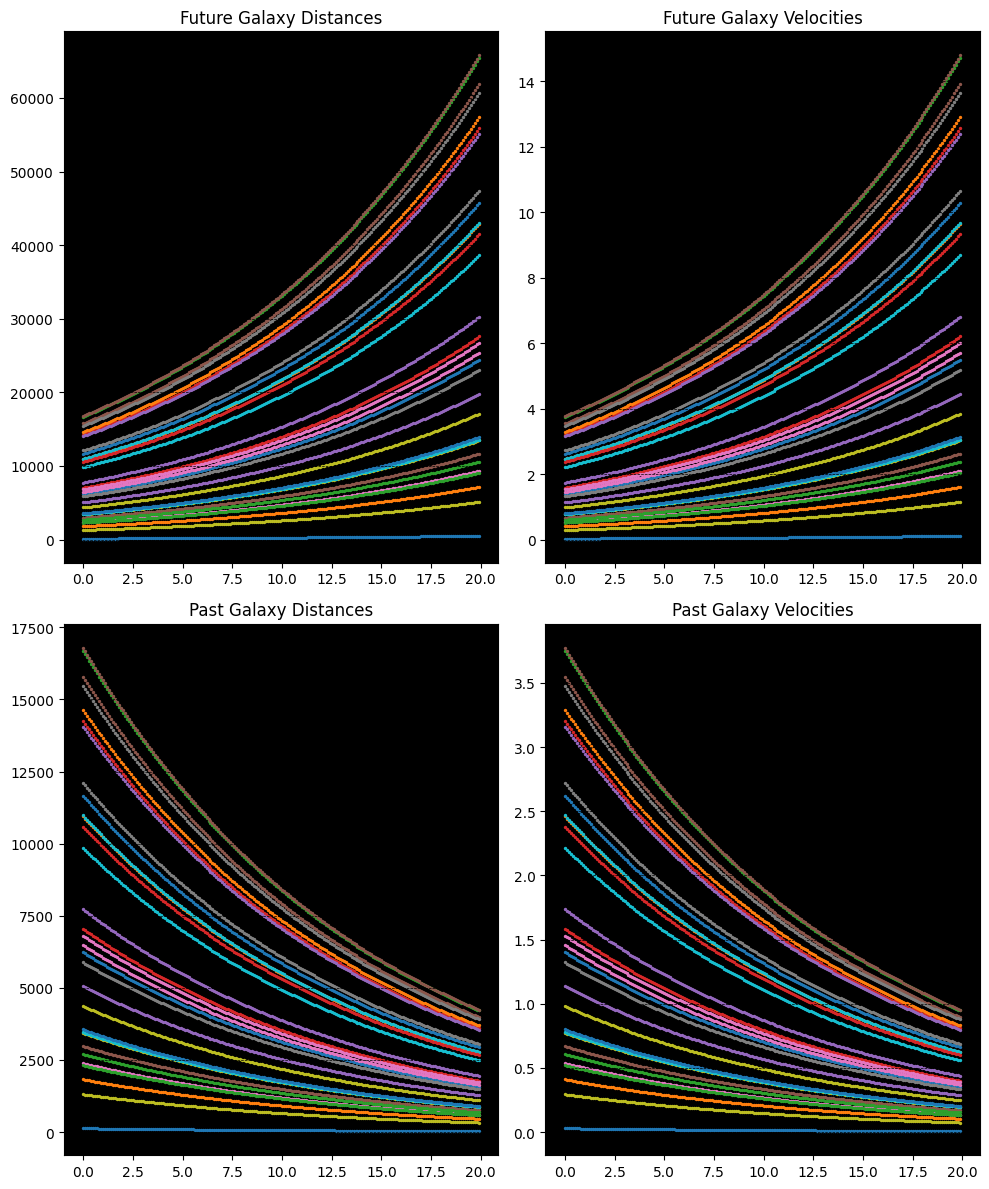

In [35]:
# plotting position and velocity magnitudes (distance and velmag)
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'black'

fig, axes = plt.subplots(2, 2,figsize=(10,12))

################  future  

# plotting future distances over time
x_values = future_distance_df.columns.tolist()
x_values[0] = 0
for n in range(0,future_distance_df.shape[0],int(round(future_distance_df.shape[0]/30))):
    axes[0,0].scatter(np.array(x_values)/1e9,future_distance_df.iloc[n].values,s=2)
axes[0,0].grid(axis='y',color = 'black',linestyle = '--', linewidth = 0.5)
# axes[0,0].set_ylim(
# axes[0,0].ylabel('Distance (Mpc)')
# axes[0,0].xlabel('Time (Billion Years)')
axes[0,0].set_title('Future Galaxy Distances')

# plotting future velocities over time
x_values = future_velmag_df.columns.tolist()
x_values[0] = 0
for n in range(0,future_velmag_df.shape[0],int(round(future_velmag_df.shape[0]/30))):
    axes[0,1].scatter(np.array(x_values)/1e9,future_velmag_df.iloc[n].values,s=2)
axes[0,1].grid(axis='y',color = 'black',linestyle = '--', linewidth = 0.5)
# plt.ylabel('Velocity (1/c)')
# plt.xlabel('Time (Billion Years)')
axes[0,1].set_title('Future Galaxy Velocities')
# plt.show()
print()

################  past

# plotting past distances over time
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'black'

x_values = past_distance_df.columns.tolist()
x_values[0] = 0
for n in range(0,past_distance_df.shape[0],int(round(past_distance_df.shape[0]/30))):
    axes[1,0].scatter(np.array(x_values)/1e9,past_distance_df.iloc[n].values,s=2)
axes[1,0].grid(axis='y',color = 'black',linestyle = '--', linewidth = 0.5)
# plt.ylabel('Distance (Mpc)')
# plt.xlabel('Time (Billion Years Ago)')
axes[1,0].set_title('Past Galaxy Distances')
# plt.show()
print()

# plotting past velocities over time
x_values = past_velmag_df.columns.tolist()
x_values[0] = 0
for n in range(0,past_velmag_df.shape[0],int(round(past_velmag_df.shape[0]/30))):
    axes[1,1].scatter(np.array(x_values)/1e9,past_velmag_df.iloc[n].values,s=2)
axes[1,1].grid(axis='y',color = 'black',linestyle = '--', linewidth = 0.5)
# plt.ylabel('Velocity (1/c)')
# plt.xlabel('Time (Billion Years Ago)')
axes[1,1].set_title('Past Galaxy Velocities')
plt.tight_layout()
plt.show()

# Visualizing Expansion
- optimize using blit=True
- galaxy colors not changing with velocity
- eventually can compare V vs D regression results to GW DL results
- constant H:
    - future expansion (colormap)
    - past expansion (colormap)
- dynamic H
    - future expansion overlayed with constant H future exp (one color for each)
    - past expansion overlayed with constant H past exp (one color for each)

### Future

#### Constant H

In [36]:
# animating future - constant H

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib tk

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'black'

data = future_position_df.copy()
zeros = np.full(len(data),0)
def animate(i):
    ax.clear()
    ax.set_axis_off()
    # galaxies
    ax.scatter(data.iloc[:,i+1].str[0].values, data.iloc[:,i+1].str[1].values,
               data.iloc[:,i+1].str[2].values, marker='o',s=6,
               c=future_velmag_df.iloc[:,i+1],cmap='rainbow')
    # hubble sphere
    ax.scatter(points_hs[:,0],points_hs[:,1],points_hs[:,2],s=2,color='white',alpha=0.35) 
    # obs universe
    ax.scatter(future_obs_radius_df.iloc[:,i+1].str[0].values,future_obs_radius_df.iloc[:,i+1].str[1].values,
               future_obs_radius_df.iloc[:,i+1].str[2].values,s=2,color='hotpink',alpha=0.25) 

    
    ax.set_xlim(-future_obs_radius_df.iloc[:,0].str[0].max()*4, future_obs_radius_df.iloc[:,0].str[0].max()*4)
    ax.set_ylim(-future_obs_radius_df.iloc[:,0].str[0].max()*4, future_obs_radius_df.iloc[:,0].str[0].max()*4)
    ax.set_zlim(-future_obs_radius_df.iloc[:,0].str[0].max()*4, future_obs_radius_df.iloc[:,0].str[0].max()*4)
    ax.set_xlabel('SGX')
    ax.set_ylabel('SGY')
    ax.set_xlabel('SGZ')
    ax.set_title('Animation of Data')
fig = plt.figure(figsize=[7.55,8])
ax = plt.axes(projection='3d')
ani = animation.FuncAnimation(fig, animate, frames=data.shape[1]-1, interval=2, repeat=True)
ax.view_init(elev=15, azim=180)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
# ani.save("Expansion_ConstantH.gif", writer="pillow")
plt.show()

#### Dynamic H

In [37]:
# animating future - dynamic H

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import warnings
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
%matplotlib tk
warnings.filterwarnings("ignore")

data = dyn_future_position_df.copy()
def animate(i):
    ax.clear()
    ax.set_axis_off()
    # galaxies
    ax.scatter(data.iloc[:,i+1].str[0].values, data.iloc[:,i+1].str[1].values,
               data.iloc[:,i+1].str[2].values, marker='o',s=7.5,
               c=dyn_future_velmag_df.iloc[:,i+1],cmap='rainbow')
    # hubble sphere
    ax.scatter(points_hs[:,0],points_hs[:,1],points_hs[:,2],s=2,color='white',alpha=0.35)
    # obs universe
    ax.scatter(dyn_future_obs_radius_df.iloc[:,i+1].str[0].values,dyn_future_obs_radius_df.iloc[:,i+1].str[1].values,
               dyn_future_obs_radius_df.iloc[:,i+1].str[2].values,s=2,color='hotpink',alpha=0.25)
    ax.set_xlim(-dyn_future_obs_radius_df.iloc[:,0].str[0].max(), dyn_future_obs_radius_df.iloc[:,0].str[0].max())
    ax.set_ylim(-dyn_future_obs_radius_df.iloc[:,0].str[0].max(), dyn_future_obs_radius_df.iloc[:,0].str[0].max())
    ax.set_zlim(-dyn_future_obs_radius_df.iloc[:,0].str[0].max(), dyn_future_obs_radius_df.iloc[:,0].str[0].max())
    ax.set_xlabel('SGX')
    ax.set_ylabel('SGY')
    ax.set_xlabel('SGZ')
    ax.set_title('Animation of Data')
fig = plt.figure(figsize=[7.55,8])
ax = plt.axes(projection='3d')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ani = animation.FuncAnimation(fig, animate, frames=len(data), interval=1, repeat=True)
ax.view_init(elev=15, azim=180)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.show()

#### Comparing

In [38]:
# comparing different Hs for future

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
%matplotlib tk

data1 = future_position_df.copy()
data2 = dyn_future_position_df.copy()
def animate(i):
    ax.clear()
    ax.set_axis_off()
    # galaxies
    # ax.scatter(data1.iloc[:,i+1].str[0].values, data1.iloc[:,i+1].str[1].values,
    #            data1.iloc[:,i+1].str[2].values, marker='o',s=5,
    #            c='cyan',alpha=0.75) # constant galaxies
    # ax.scatter(data2.iloc[:,i+1].str[0].values, data2.iloc[:,i+1].str[1].values,
    #            data2.iloc[:,i+1].str[2].values, marker='o',s=5,
    #            c='yellow',alpha=0.75) # dynamic galaxies
    # hubble sphere
    ax.scatter(points_hs[:,0],points_hs[:,1],points_hs[:,2],s=2,color='white',alpha=0.35) # hubble sphere
    # const H obs univ
    ax.scatter(future_obs_radius_df.iloc[:,i+1].str[0].values,future_obs_radius_df.iloc[:,i+1].str[1].values,
               future_obs_radius_df.iloc[:,i+1].str[2].values,s=2,color='cyan',alpha=0.25) # const obs univ
    # dynamic H obs univ
    ax.scatter(dyn_future_obs_radius_df.iloc[:,i+1].str[0].values,dyn_future_obs_radius_df.iloc[:,i+1].str[1].values,
               dyn_future_obs_radius_df.iloc[:,i+1].str[2].values,s=2,color='yellow',alpha=0.25) # dyn obs univ
    ax.set_xlim(-future_obs_radius_df.iloc[:,0].str[0].max(), future_obs_radius_df.iloc[:,0].str[0].max())
    ax.set_ylim(-future_obs_radius_df.iloc[:,0].str[0].max(), future_obs_radius_df.iloc[:,0].str[0].max())
    ax.set_zlim(-future_obs_radius_df.iloc[:,0].str[0].max(), future_obs_radius_df.iloc[:,0].str[0].max())
    ax.set_xlabel('SGX')
    ax.set_ylabel('SGY')
    ax.set_xlabel('SGZ')
    ax.set_title('Animation of Data')
fig = plt.figure(figsize=[7.55,8])
ax = plt.axes(projection='3d')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ani = animation.FuncAnimation(fig, animate, frames=len(data1), interval=1, repeat=True)
ax.view_init(elev=15, azim=180)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.show()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/tkinter/__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/tkinter/__init__.py", line 861, in callit
    func(*args)
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/backends/_backend_tk.py", line 142, in _on_timer
    super()._on_timer()
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/backend_bases.py", line 1226, in _on_timer
    ret = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py", line 1426, in _step
    still_going = super()._step(*args)
                  ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py", line 1119, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/animatio

### Past

#### Constant H

In [39]:
# animating past - constant H

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'

%matplotlib tk

data = past_position_df.copy()
def animate(i):
    ax.clear()
    ax.set_axis_off()
    ax.scatter(data.iloc[:,i+1].str[0].values, data.iloc[:,i+1].str[1].values,
               data.iloc[:,i+1].str[2].values, marker='o',s=7.5,
               c=past_velmag_df.iloc[:,i+1],cmap='rainbow')
    ax.scatter(points_hs[:,0],points_hs[:,1],points_hs[:,2],s=2,color='white',alpha=0.35)
    ax.scatter(past_obs_radius_df.iloc[:,i+1].str[0].values,past_obs_radius_df.iloc[:,i+1].str[1].values,
               past_obs_radius_df.iloc[:,i+1].str[2].values,s=2,color='hotpink',alpha=0.25)
    ax.set_xlim(-past_obs_radius_df.iloc[:,0].str[0].max()/2, past_obs_radius_df.iloc[:,0].str[0].max()/2)
    ax.set_ylim(-past_obs_radius_df.iloc[:,0].str[0].max()/2, past_obs_radius_df.iloc[:,0].str[0].max()/2)
    ax.set_zlim(-past_obs_radius_df.iloc[:,0].str[0].max()/2, past_obs_radius_df.iloc[:,0].str[0].max()/2)
    ax.set_xlabel('SGX')
    ax.set_ylabel('SGY')
    ax.set_xlabel('SGZ')
    ax.set_title('Animation of Data')
    
fig = plt.figure(figsize=[7.55,8])
ax = plt.axes(projection='3d')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ani = animation.FuncAnimation(fig, animate, frames=data.shape[1]-1, interval=1, repeat=True)
ax.view_init(elev=15, azim=180)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
# saving animation
# ani.save("Contraction_ConstantH.gif", writer="pillow")
plt.show()

#### Dynamic H
- need expansion of universe with dynamic H

In [40]:
# animating past - dynamic H

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib tk

data = dyn_past_position_df.copy()
def animate(i):
    ax.clear()
    ax.set_axis_off()
    ax.scatter(data.iloc[:,i+1].str[0].values, data.iloc[:,i+1].str[1].values,
               data.iloc[:,i+1].str[2].values, marker='o',s=7.5,
               c=dyn_past_velmag_df.iloc[:,i+1],cmap='rainbow')
    ax.scatter(points_hs[:,0],points_hs[:,1],points_hs[:,2],s=2,color='white',alpha=0.35)
    ax.scatter(dyn_past_obs_radius_df.iloc[:,i+1].str[0].values,dyn_past_obs_radius_df.iloc[:,i+1].str[1].values,
               dyn_past_obs_radius_df.iloc[:,i+1].str[2].values,s=2,color='hotpink',alpha=0.25)
    ax.set_xlim(-dyn_past_obs_radius_df.iloc[:,0].str[0].max(), dyn_past_obs_radius_df.iloc[:,0].str[0].max())
    ax.set_ylim(-dyn_past_obs_radius_df.iloc[:,0].str[0].max(), dyn_past_obs_radius_df.iloc[:,0].str[0].max())
    ax.set_zlim(-dyn_past_obs_radius_df.iloc[:,0].str[0].max(), dyn_past_obs_radius_df.iloc[:,0].str[0].max())
    ax.set_xlabel('SGX')
    ax.set_ylabel('SGY')
    ax.set_xlabel('SGZ')
    ax.set_title('Animation of Data')
fig = plt.figure(figsize=[7.55,8])
ax = plt.axes(projection='3d')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ani = animation.FuncAnimation(fig, animate, frames=data.shape[1], interval=1, repeat=True)
ax.view_init(elev=15, azim=180)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.show()

#### Comparing

In [41]:
# animating past - poly H

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
%matplotlib tk

data1 = past_position_df.copy()
data2 = dyn_past_position_df.copy()
def animate(i):
    ax.clear()
    ax.set_axis_off()
    # ax.scatter(data1.iloc[:,i+1].str[0].values, data1.iloc[:,i+1].str[1].values,
    #            data1.iloc[:,i+1].str[2].values, marker='o',s=7.5,
    #            c='cyan',alpha=0.05)
    # ax.scatter(data2.iloc[:,i+1].str[0].values, data2.iloc[:,i+1].str[1].values,
    #            data2.iloc[:,i+1].str[2].values, marker='o',s=7.5,
    #            c='yellow',alpha=0.05)
    ax.scatter(points_hs[:,0],points_hs[:,1],points_hs[:,2],s=2,color='white',alpha=0.35)
    ax.scatter(past_obs_radius_df.iloc[:,i+1].str[0].values,past_obs_radius_df.iloc[:,i+1].str[1].values,
               past_obs_radius_df.iloc[:,i+1].str[2].values,s=2,color='cyan',alpha=0.25) # const obs univ
    ax.scatter(dyn_past_obs_radius_df.iloc[:,i+1].str[0].values,dyn_past_obs_radius_df.iloc[:,i+1].str[1].values,
                dyn_past_obs_radius_df.iloc[:,i+1].str[2].values,s=2,color='yellow',alpha=0.25) # dyn obs univ
    ax.set_xlim(-past_obs_radius_df.iloc[:,0].str[0].max(), past_obs_radius_df.iloc[:,0].str[0].max())
    ax.set_ylim(-past_obs_radius_df.iloc[:,0].str[0].max(), past_obs_radius_df.iloc[:,0].str[0].max())
    ax.set_zlim(-past_obs_radius_df.iloc[:,0].str[0].max(), past_obs_radius_df.iloc[:,0].str[0].max())
    
    ax.set_xlabel('SGX')
    ax.set_ylabel('SGY')
    ax.set_xlabel('SGZ')
    ax.set_title('Animation of Data')
fig = plt.figure(figsize=[7.55,8])
ax = plt.axes(projection='3d')
ani = animation.FuncAnimation(fig, animate, frames=len(data1)-1, interval=1, repeat=True)
ax.view_init(elev=15, azim=180)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.show()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/tkinter/__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/tkinter/__init__.py", line 861, in callit
    func(*args)
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/backends/_backend_tk.py", line 142, in _on_timer
    super()._on_timer()
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/backend_bases.py", line 1226, in _on_timer
    ret = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py", line 1426, in _step
    still_going = super()._step(*args)
                  ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py", line 1119, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/animatio

In [42]:
# plotting distance distributions

past_distance_df.iloc[:,0].hist(bins=50,color='cyan',label='t=0')
past_distance_df.iloc[:,-1].hist(bins=50,color='red',label='final t')
plt.title('Distance Distributions')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Frequency')
legend = plt.legend(facecolor='gray',edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')
plt.show()

## Time Dilation
- plot histograms of mass vs relativistic mass, etc

In [43]:
# accounting for special relativity
gamma = 1/(np.emath.sqrt(1-((future_velmag_df.iloc[:,-1]*c)**2/c**2)))

# for 1 billion years passing
t0 = 1e9*secs_in_yr
t = t0 * gamma
t = abs(t)

# for 500 Mpc distance
L0 = 500
L = L0/gamma
L = abs(L)


# for milky way mass
m0 = 2.9833800017169e+42
m = m0*gamma
m = abs(m)
print(t[0],L[0],m[0])

5839803107951795.0 2700.091031926989 5.524591516434419e+41


The relativistic effects of galaxies' expansion velocities being faster than light are calculated. 

For example, for a galaxy whose expansion velocity is 3.27e6 km/s (10.89 times the speed of light): 
- An observer in a rest frame experiencing 1e9 years passing - the galaxy will have experienced 4.1e16 years
- An observer in a rest frame crossing 500 Mpc - the galaxy will measure 384 Mpc
- An observer in a rest frame observing a galaxy of the same mass as the Milky Way (2.9e42 kg) - the galaxy will measure 3.88e42 kg

## Effects of Gravity

In [44]:
# a = GM/d^2
# avg galaxy mass between 10^7 and 10^12 solar masses.
G = 6.67e-11 # gravitational constant
m_solar = 1.989e+30 # kg
gamma = 1/(np.emath.sqrt(1-((galaxy_df['Vexp'])**2/c**2)))
m_avg = galaxy_df.shape[0]*m_solar*(1e7 + 1e12)/2 # avg mass of all galaxies
m_adj = m_avg * gamma # adjusting for relativistic mass

a = G*m_adj/(galaxy_df['D']*km_in_Mpc*1e3)**2
a.max()

2.601002056977455e-07

In [45]:
mean_distance = galaxy_df['D'].mean()
mean_Vexp = mean_distance*H_const
mean_Vexp

15396.606150534484

The maximum acceleration due to gravity at these distances, adjusted for relativistic mass (relative to the Milky Way) is of the order 10^-15 km/s^2, making its effects negligible compared to the average of all our galaxy's expansion velocities of 1.6e4 m/s.

## Temperature? Quantum fluctuations/Virtual particles? Entropy? Other universes expanding into ours? Values of entangled particles? How does spacetime expand inside/near a black hole (Vesc > c and Vexp > c)? Twin paradox? Potential causes of expansion?

## Escaping Black Holes
- ignores general relativity (spacetime is too curved, expansion has no real direction)
- this would work if spacetime was flat inside black holes

In [46]:
# Vexp is radially outward - so radius increases by D = V/H
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
import warnings 
warnings.filterwarnings("ignore")

H_const = 71 # roughly

# Schwarschild radius R = 2GM/c^2
# upper range of supermassive black hole mass: 100 billion solar masses
G = 6.67e-11 # m^3/kg/s^2
m_solar = 1.989e+30 
c = 299792
secs_in_yr = 31536000
km_in_Mpc = 3.086e+19
# H_const = 71.16 # for now
m_bh = 50e9*m_solar # supermassive black hole
# m_bh = 10*m_solar # average black hole
R_bh = 2*G*m_bh/((c*1e3)**2)/(km_in_Mpc*1e3) # Mpc
Vexp_eh = H_const*R_bh
print('Radius of event horizon:',round(R_bh*1e9,5),'pc')
print(f'Expansion velocity at event horizon: {round(Vexp_eh*1e6,5)} mm/s')

# event horizon
theta = np.arange(0,2.01*np.pi,2.01*np.pi/1000)
x_bh = R_bh*np.cos(theta)
y_bh = R_bh*np.sin(theta)

# stars
stars = 3*R_bh*np.random.uniform(-1,1,size=(500,2))
for point in stars:
    distance = np.linalg.norm(point)
    if distance <= R_bh*1.05:
        stars = [arr for arr in stars if not (arr == point).any()]
stars = np.array(stars)

# particle positions - constant H
dt = 1e5
omega = c/R_bh # angular velocity of particle at c
time = np.arange(0,6e7,dt)
photon_rad = {}
int_photon_rad = {} # internal photon
stat_photon_rad = {} # stationary particle
photon_rad[0] = R_bh
int_photon_rad[0] = R_bh*0.5 # orbital velocity is c at 0.5 radius 
stat_photon_rad[0] = R_bh*0.75
grav_str = {}
grav_str[0] = G * m_bh/(photon_rad[0]*km_in_Mpc*1e3)**2
int_grav_str = {}
int_grav_str[0] = G * m_bh/(int_photon_rad[0]*km_in_Mpc*1e3)**2
stat_grav_str = {}
stat_grav_str[0] = G * m_bh/(stat_photon_rad[0]*km_in_Mpc*1e3)**2
for t in time[1:]:
    # adjusting positions: D = D0 + Vexpdt + R due to gravity
    # gravity: delta R = R2-R1, where a1 = GM/R1^2, a2 = GM/R2^2
    grav_str[t] = G * m_bh/(photon_rad[t-dt]*km_in_Mpc*1e3)**2 
    photon_rad[t] = photon_rad[t-dt] + H_const*photon_rad[t-dt]/km_in_Mpc*dt*secs_in_yr + (np.sqrt(G*m_bh/grav_str[t]) - np.sqrt(G*m_bh/grav_str[t-dt]))/(1e3*km_in_Mpc) 
    int_grav_str[t] = G * m_bh/(int_photon_rad[t-dt]*km_in_Mpc*1e3)**2
    int_photon_rad[t] = int_photon_rad[t-dt] + H_const*int_photon_rad[t-dt]/km_in_Mpc*dt*secs_in_yr + (np.sqrt(G*m_bh/int_grav_str[t]) - np.sqrt(G*m_bh/int_grav_str[t-dt]))/(1e3*km_in_Mpc)
    stat_grav_str[t] = G * m_bh/(stat_photon_rad[t-dt]*km_in_Mpc*1e3)**2
    stat_photon_rad[t] = stat_photon_rad[t-dt] + H_const*stat_photon_rad[t-dt]/km_in_Mpc*dt*secs_in_yr + (np.sqrt(G*m_bh/stat_grav_str[t]) - np.sqrt(G*m_bh/stat_grav_str[t-dt]))/(1e3*km_in_Mpc) # + gravity

# particle positions - dynamic H
dyn_photon_rad = {}
dyn_int_photon_rad = {} # internal photon
dyn_stat_photon_rad = {} # stationary particle
dyn_photon_rad[0] = R_bh
dyn_int_photon_rad[0] = R_bh*0.5 # orbital velocity is c at 0.5 radius 
dyn_stat_photon_rad[0] = R_bh*0.75
dyn_grav_str = {}
dyn_grav_str[0] = G * m_bh/(dyn_photon_rad[0]*km_in_Mpc*1e3)**2
dyn_int_grav_str = {}
dyn_int_grav_str[0] = G * m_bh/(dyn_int_photon_rad[0]*km_in_Mpc*1e3)**2
dyn_stat_grav_str = {}
dyn_stat_grav_str[0] = G * m_bh/(dyn_stat_photon_rad[0]*km_in_Mpc*1e3)**2
for t in time[1:]:
    # adjusting positions: D = D0 + Vexpdt + R due to gravity
    # gravity: delta R = R2-R1, where a1 = GM/R1^2, a2 = GM/R2^2
    dyn_grav_str[t] = G * m_bh/(photon_rad[t-dt]*km_in_Mpc*1e3)**2 
    dyn_photon_rad[t] = dyn_photon_rad[t-dt] + log_model.predict(poly.transform(np.log(np.array(dyn_photon_rad[0])).reshape(-1,1)))[0][0]/km_in_Mpc*dt*secs_in_yr + (np.sqrt(G*m_bh/dyn_grav_str[t]) - np.sqrt(G*m_bh/dyn_grav_str[t-dt]))/(1e3*km_in_Mpc) 
    dyn_int_grav_str[t] = G * m_bh/(int_photon_rad[t-dt]*km_in_Mpc*1e3)**2
    dyn_int_photon_rad[t] = dyn_int_photon_rad[t-dt] + log_model.predict(poly.transform(np.log(np.array(dyn_int_photon_rad[0])).reshape(-1,1)))[0][0]/km_in_Mpc*dt*secs_in_yr + (np.sqrt(G*m_bh/dyn_int_grav_str[t]) - np.sqrt(G*m_bh/dyn_int_grav_str[t-dt]))/(1e3*km_in_Mpc)
    dyn_stat_grav_str[t] = G * m_bh/(stat_photon_rad[t-dt]*km_in_Mpc*1e3)**2
    dyn_stat_photon_rad[t] = dyn_stat_photon_rad[t-dt] + log_model.predict(poly.transform(np.log(np.array(dyn_stat_photon_rad[0])).reshape(-1,1)))[0][0]/km_in_Mpc*dt*secs_in_yr + (np.sqrt(G*m_bh/dyn_stat_grav_str[t]) - np.sqrt(G*m_bh/dyn_stat_grav_str[t-dt]))/(1e3*km_in_Mpc) # + gravity

# final distances
photon_r_final = photon_rad[time[-1]]
int_photon_r_final = int_photon_rad[time[-1]]
stat_photon_r_final = stat_photon_rad[time[-1]]
dyn_photon_r_final = dyn_photon_rad[time[-1]]
dyn_int_photon_r_final = dyn_int_photon_rad[time[-1]]
dyn_stat_photon_r_final = dyn_stat_photon_rad[time[-1]]

# orbital velocity V = sqrt(GM/R)
photon_v0 = round(np.sqrt(G*m_bh/(photon_rad[0]*km_in_Mpc*1000))/(c*1e3),2)
int_photon_v0 = round(np.sqrt(G*m_bh/int_photon_rad[0]/(km_in_Mpc*1000))/(c*1e3),2)
stat_photon_v0 = 0
dyn_photon_v0 = round(np.sqrt(G*m_bh/(dyn_photon_rad[0]*km_in_Mpc*1000))/(c*1e3),2)
dyn_int_photon_v0 = round(np.sqrt(G*m_bh/dyn_int_photon_rad[0]/(km_in_Mpc*1000))/(c*1e3),2)
dyn_stat_photon_v0 = 0

# orbital velocities to be correct related to one another
x_photon = np.array(list(photon_rad.values()))*np.cos(4*np.pi*time/max(time))
y_photon = np.array(list(photon_rad.values()))*np.sin(4*np.pi*time/max(time))
int_x_photon = np.array(list(int_photon_rad.values()))*np.cos(4*int_photon_v0/photon_v0*np.pi*time/max(time))
int_y_photon = np.array(list(int_photon_rad.values()))*np.sin(4*int_photon_v0/photon_v0*np.pi*time/max(time))
stat_x_photon = np.array(list(stat_photon_rad.values()))*np.cos(np.pi/3)
stat_y_photon = np.array(list(stat_photon_rad.values()))*np.sin(np.pi/3)

# orbital velocities to be correct related to one another
dyn_x_photon = np.array(list(dyn_photon_rad.values()))*np.cos(4*np.pi*time/max(time))
dyn_y_photon = np.array(list(dyn_photon_rad.values()))*np.sin(4*np.pi*time/max(time))
dyn_int_x_photon = np.array(list(dyn_int_photon_rad.values()))*np.cos(4*dyn_int_photon_v0/dyn_photon_v0*np.pi*time/max(time))
dyn_int_y_photon = np.array(list(dyn_int_photon_rad.values()))*np.sin(4*dyn_int_photon_v0/dyn_photon_v0*np.pi*time/max(time))
dyn_stat_x_photon = np.array(list(dyn_stat_photon_rad.values()))*np.cos(np.pi/3)
dyn_stat_y_photon = np.array(list(dyn_stat_photon_rad.values()))*np.sin(np.pi/3)

Radius of event horizon: 4.78327 pc
Expansion velocity at event horizon: 0.33961 mm/s


In [47]:
# plotting 
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,7),sharey=True,sharex=True)

# initial positions
ax1.plot(x_bh,y_bh,color='white',linewidth=2,alpha=0.5)
ax1.scatter(stars[:,0],stars[:,1],c='white',s=0.1)
ax1.set_xlim([-stars[:,0].max()/1.5,stars[:,0].max()/1.5])
ax1.set_ylim([-stars[:,0].max()/1.5,stars[:,0].max()/1.5])

ax1.scatter(x_photon[0],y_photon[0],color='yellow',linewidth=1,alpha=0.7,label=f'v0: {photon_v0}c')
ax1.scatter(int_x_photon[0],int_y_photon[0],color='hotpink',linewidth=1,alpha=0.7,label=f'v0: {int_photon_v0}c')
ax1.scatter(stat_x_photon[0],stat_y_photon[0],color='cyan',linewidth=1,alpha=0.7,label=f'v0: {stat_photon_v0}c')
ax1.text(-stars[:,0].max()/10,stars[:,0].max()/2,'Initial Positions',color='white')
ax1.legend(facecolor='k', labelcolor='w',loc='upper right')

# constant H paths
ax2.plot(x_bh,y_bh,color='white',linewidth=2,alpha=0.5)
ax2.scatter(stars[:,0],stars[:,1],c='white',s=0.1)
ax2.set_xlim([-stars[:,0].max()/1.5,stars[:,0].max()/1.5])
ax2.set_ylim([-stars[:,0].max()/1.5,stars[:,0].max()/1.5])

ax2.plot(x_photon,y_photon,color='yellow',linewidth=1,alpha=0.7)
ax2.plot(int_x_photon,int_y_photon,color='hotpink',linewidth=1,alpha=0.7)
ax2.plot(stat_x_photon,stat_y_photon,color='cyan',linewidth=1,alpha=0.7)
ax2.text(-stars[:,0].max()/5,stars[:,0].max()/1.75,f'Paths over {round((time[-1]-time[0])/1e6)}M Yrs',color='white')

# dynamic H paths
ax3.plot(x_bh,y_bh,color='white',linewidth=2,alpha=0.5)
ax3.scatter(stars[:,0],stars[:,1],c='white',s=0.1)
ax3.set_xlim([-stars[:,0].max()/1.5,stars[:,0].max()/1.5])
ax3.set_ylim([-stars[:,0].max()/1.5,stars[:,0].max()/1.5])

ax3.plot(dyn_x_photon,dyn_y_photon,color='yellow',linewidth=1,alpha=0.7)
ax3.plot(dyn_int_x_photon,dyn_int_y_photon,color='hotpink',linewidth=1,alpha=0.7)
ax3.plot(dyn_stat_x_photon,dyn_stat_y_photon,color='cyan',linewidth=1,alpha=0.7)
ax3.text(-stars[:,0].max()/5,stars[:,0].max()/1.75,f'Paths over {round((time[-1]-time[0])/1e6)}M Yrs',color='white')

plt.tight_layout()
plt.show()

In [49]:
# animating particle escape
import matplotlib.animation as animation
%matplotlib tk
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'


# setting colors for gravity lines
# can make list out of the hex colors to loop through and make code shorter
particle_colors = []
int_particle_colors = []
stat_particle_colors = []
radius_list = [photon_rad,int_photon_rad,stat_photon_rad]
colors_list = [particle_colors,int_particle_colors,stat_particle_colors]
for i in range(0,3):
    # violet --> blue --> turquoise --> green --> yellow --> orange --> red
    for value in radius_list[i].values():
        if value < R_bh*0.6:
            colors_list[i] += ['#ff1414']
        elif (value >= R_bh*0.6) & (value < R_bh*0.8):
            colors_list[i] += ['#ffb01c']
        elif (value >= R_bh*0.8) & (value < R_bh*1):
            colors_list[i] += ['#f1ff1c']
        elif (value >= R_bh*1) & (value < R_bh*1.2):
            colors_list[i] += ['#1cff39']
        elif (value >= R_bh*1.2) & (value < R_bh*1.4):
            colors_list[i] += ['#1ceaff']
        elif (value >= R_bh*1.4) & (value < R_bh*1.6):
            colors_list[i] += ['#095bfe']
        elif value >= R_bh*1.6:
            colors_list[i] += ['#784fff']    
        else:
            colors_list[i] += ['white']


def animate(i):
    ax.clear()
    ax.set_axis_off()
    # particle orbiting at event horizon
    ax.scatter(x_photon[i],y_photon[i],color='yellow',s=10,label=f'Vexp: {round(H_const*photon_rad[i*dt]*1e6,1)} mm/s\nGravity: -{round(grav_str[i*dt])} m/s^2\nR_final: {round(photon_r_final/R_bh,1)} R_bh')
    # internal photon
    ax.scatter(int_x_photon[i],int_y_photon[i],color='hotpink',s=10,label=f'Vexp: {round(H_const*int_photon_rad[i*dt]*1e6,1)} mm/s\nGravity: -{round(int_grav_str[i*dt])} m/s^2\nR_final: {round(int_photon_r_final/R_bh,1)} R_bh')
    # stationary particle
    ax.scatter(stat_x_photon[i],stat_y_photon[i],color='cyan',s=10,label=f'Vexp: {round(H_const*stat_photon_rad[i*dt]*1e6,1)} mm/s\nGravity: -{round(stat_grav_str[i*dt])} m/s^2\nR_final: {round(stat_photon_r_final/R_bh,1)} R_bh')
    # gravity
    ax.plot([0,x_photon[i]],[0,y_photon[i]],color=particle_colors[i],linewidth=0.5,linestyle='--',alpha=0.75)
    ax.plot([0,int_x_photon[i]],[0,int_y_photon[i]],color=int_particle_colors[i],linewidth=0.5,linestyle='--',alpha=0.75)
    ax.plot([0,stat_x_photon[i]],[0,stat_y_photon[i]],color=stat_particle_colors[i],linewidth=0.5,linestyle='--',alpha=0.75)
    # event horizon
    ax.plot(x_bh,y_bh,color='white',linewidth=0.2,alpha=1)
    # stars
    ax.scatter(stars[:,0],stars[:,1],c='white',s=0.1)
    ax.set_xlim([-stars[:,0].max()/1.25,stars[:,0].max()/1.25])
    ax.set_ylim([-stars[:,0].max()/1.25,stars[:,0].max()/1.25])
    ax.text(-stars[:,0].max()/1.5,stars[:,0].max()/2.8,f't = {round(i*dt/1e6)} M yrs',color='white',size=12)
    ax.text(-stars[:,0].max()/1.5,stars[:,0].max()/3.2,f'R_bh = {round(R_bh*1e9,1)} pc',color='white',size=12)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Photon Escape')
    ax.legend(facecolor='k', labelcolor='w',loc='upper left')
    return 
fig = plt.figure(figsize=[7.55,8])
ax = plt.axes()
ani = animation.FuncAnimation(fig, animate, frames=len(x_photon), interval=1, repeat=False)

plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
ani.save("Particle_Escape.gif", writer="pillow")
plt.show()

Similar behaviors with any size of black hole. Orbital velocities are invariant between black hole sizes, since mass and radius are linearly related, and are inversely related in the orbital velocity equation. So, a particle at 0.5 the radius of a black hole, of any radius and mass, will orbit at the speed of light. At the event horizon, the particle will be orbiting at ~0.71c. 

The smaller relative changes in distance for smaller black holes cause small changes in position due to lower expansion velocities to cause a higher change in gravitational acceleration, helping drive the escape. The high distances of large black holes cause the high expansion velocity to drive higher distances, and thus higher differences in gravity, accelerating the escape.

## Time it takes to escape
- regression on our data to find relationship between R and time it takes to escape?

In [56]:
# finding time to escape for int_particle
# loop through initial R values and run regression to find R vs t (does it vary by M_bh?)
t_esc = time[np.where(np.array(list(stat_photon_rad.values()))>=R_bh)[0][0]]
t_esc

0.0

#### Building values for i particles across n black holes

In [50]:
# building values

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'

# defining constants
G = 6.67e-11 # m^3/kg/s^2
m_solar = 1.989e+30 
c = 299792
secs_in_yr = 31536000
km_in_Mpc = 3.086e+19
H_const = 71.16 # for now

# building initial states for all black holes / particles
# iterating through 5 black holes of varying mass 
dt = 1e7
time = np.arange(0,5e9,dt) # 2e9 is good for plot, 1e10 is good for escape time calculation
bh_dict = {}

for n in range(1,6):
    particle_dict = {}
    bh_dict[n] = {}
    m_bh = 2*m_solar*(10**(2*n))
    bh_dict[n]['mass'] = m_bh # from 2 solar masses to 2e10 solar masses
    R_bh = 2*G*m_bh/((c*1e3)**2)/(km_in_Mpc*1e3) # Mpc, Schwarschild radius R = 2GM/c^2
    bh_dict[n]['radius'] = R_bh
    # iterating through 99 particles
    mean_v0 = 0
    start = 1
    stop = 101
    # for i in np.arange(start,stop,0.5):
    for i in range(start,stop):
        particle_dict[i] = {}
        particle_dict[i]['distance'] = {}
        particle_dict[i]['distance'][0] = R_bh * 0.01*i
        particle_dict[i]['grav_str'] = {}
        particle_dict[i]['grav_str'][0] = G * m_bh/(particle_dict[i]['distance'][0]*km_in_Mpc*1e3)**2
        particle_dict[i]['x'] = {}
        particle_dict[i]['x'][0] = particle_dict[i]['distance'][0]*np.cos(0)
        particle_dict[i]['y'] = {}
        particle_dict[i]['y'][0] = particle_dict[i]['distance'][0]*np.sin(0)
        # orbital velocity V = sqrt(GM/R)
        particle_dict[i]['v0'] = round(np.sqrt(G*m_bh/(particle_dict[i]['distance'][0]*km_in_Mpc*1000))/(c*1e3),2)
        mean_v0 += particle_dict[i]['v0']
        for t in time[1:]:
            particle_dict[i]['grav_str'][t] = G * m_bh/(particle_dict[i]['distance'][t-dt]*km_in_Mpc*1e3)**2
            
            particle_dict[i]['distance'][t] = (
                particle_dict[i]['distance'][t-dt] + #initial distance
                H_const*particle_dict[i]['distance'][t-dt]/km_in_Mpc*dt*secs_in_yr + # Vexp
                (np.sqrt(G*m_bh/particle_dict[i]['grav_str'][t]) - 
                 np.sqrt(G*m_bh/particle_dict[i]['grav_str'][t-dt]))/(1e3*km_in_Mpc)) # delta_gravity
            
            particle_dict[i]['x'][t] = particle_dict[i]['distance'][t]*np.cos(i*np.pi*t/max(time))
            particle_dict[i]['y'][t] = particle_dict[i]['distance'][t]*np.sin(i*np.pi*t/max(time))
        
        particle_dict[i]['t_esc'] = -1 # initializing value for particles that do not escape
        try:
            particle_dict[i]['t_esc'] = time[np.where(np.array(list(particle_dict[i]['distance'].values())) >= R_bh)[0][0]] # subtract 1 because time starts at 1
        except:
            continue
        # can optimize by running these somehow instead of iterating position over t
        # particle_dict[i]['x'] = np.array(list(photon_rad.values()))*np.cos(4*np.pi*time/max(time))
        # y_particle[i] = np.array(list(photon_rad.values()))*np.sin(4*np.pi*time/max(time))


    # adding entries to black hole dictionary
    bh_dict[n]['particles'] = particle_dict
    mean_v0 = mean_v0/(stop-start)
# bh_dict[1]
print('bh_dict created')

bh_dict created


In [51]:
# plotting distance over time
plt.rcParams['figure.facecolor'] = 'lightgray'
plt.rcParams['axes.facecolor'] = 'lightgray'

bh_num = 1 # which black hole in bh_dict we want to plot
R_bh = bh_dict[bh_num]['radius']

fig, ax1 = plt.subplots(figsize=[8,7])
for i in range(start,stop):
    x = np.array(list(bh_dict[bh_num]['particles'][i]['distance'].keys()))
    y = np.array(list(bh_dict[bh_num]['particles'][i]['distance'].values()))
    ax1.scatter(x,y,s=2,linestyle='--',cmap='rainbow',alpha=0.7)
ax1.set_title('Distance to Singularity vs Time')
ax1.set_xlabel('Time (yrs)')
ax1.set_ylabel('Distance (Mpc)')
ax1.set_xlim([0,time[-1]])
plt.show()

### finding time to escape
- weird escape time values at low distances 

In [52]:
# getting data in usable format
escape_times = []
init_distances = []
mass_bh = []
for n in range(1,6):
    for i in range(1,100):
        escape_times += [bh_dict[n]['particles'][i]['t_esc']]
        init_distances += [bh_dict[n]['particles'][i]['distance'][0]/bh_dict[n]['radius']]
        mass_bh += [2*(10**(2*n))] # dividing out m_solar to make numbers easier
temp_df = pd.DataFrame(data=[mass_bh,init_distances,escape_times])
temp_df = temp_df.T
temp_df.rename(columns={0:'mass_bh',1:'init_distance',2:'escape_time'},inplace=True)
# temp_df = temp_df[temp_df['mass_bh']==200]

plt.scatter(temp_df['init_distance'],temp_df['escape_time'],c=temp_df['mass_bh'])
plt.title('Escape Time vs Initial Distance')
plt.xlabel('Initial Distance (D/R_bh)')
plt.ylabel('Escape time (yrs)')
plt.show()

#### finding relationship
- bring in mass of black hole as feature
    - need to be able to plot all data

In [53]:
# training on radius, predicting escape time
# don't need mass at all

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


temp_df = temp_df[temp_df['escape_time']!=0] # reducing down to particles that have nonzero time to escape, i.e. not already outside BH
X = temp_df[['init_distance']].copy()
y = temp_df[['escape_time']].copy()

y = np.log(y) # looking for exponential fit 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

poly = PolynomialFeatures(degree=5,include_bias=False)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

esc_model = LinearRegression(fit_intercept=True)
esc_model.fit(X_train,y_train)

temp_df['predicted_tesc'] = np.e**esc_model.predict(poly.transform(temp_df['init_distance'].values.reshape(-1,1)))

print(esc_model.score(X_train,y_train))
print(esc_model.score(X_test,y_test))
temp_df

0.9971867770214488
0.9957816146744184


,mass_bh,init_distance,escape_time,predicted_tesc
0,2.000000e+02,0.01,1.960000e+09,1.861056e+09
1,2.000000e+02,0.02,1.710000e+09,1.716991e+09
2,2.000000e+02,0.03,1.560000e+09,1.594613e+09
3,2.000000e+02,0.04,1.450000e+09,1.490061e+09
4,2.000000e+02,0.05,1.370000e+09,1.400258e+09
...,...,...,...,...
490,2.000000e+10,0.95,1.200000e+08,1.089477e+08
491,2.000000e+10,0.96,1.100000e+08,9.769282e+07
492,2.000000e+10,0.97,9.000000e+07,8.680194e+07
493,2.000000e+10,0.98,7.000000e+07,7.637335e+07


In [54]:
esc_model.coef_

array([[ -9.1477701 ,  38.48503414, -93.4360903 , 105.70489711,
        -45.17511938]])

We end up with a polynomial logarithmic equation that models escape time vs distance:
(ln(t) = c + mD), ln(t) = aD + bD^2 + cD^3 + dD^4 + eD^5, so t_esc = e^ln(t). 

The time it takes to escape at each relative radius (1%R_bh, 2%R_bh...) appears to be the same, regardless of black hole mass/radius, assuming constant H. The dynamic H value may cause this to change with distance.

## Clustering
- Centroids currently making no sense

In [58]:
## clustering to see if there are distance-velocity cluster relationships
# optimal 2 clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_cluster = galaxy_df[['D','Vexp']].copy()

for n in range (2,4):
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(X_cluster)
    # gather the predictions
    preds= model.predict(X_cluster)
    score = silhouette_score(X_cluster, preds)
    print('Silhouette score for ',n,' clusters: ',score)
# print('Optimal clusters:',max(scores, key=scores.get))

Silhouette score for  2  clusters:  0.6488166394909173
Silhouette score for  3  clusters:  0.5837742277936658


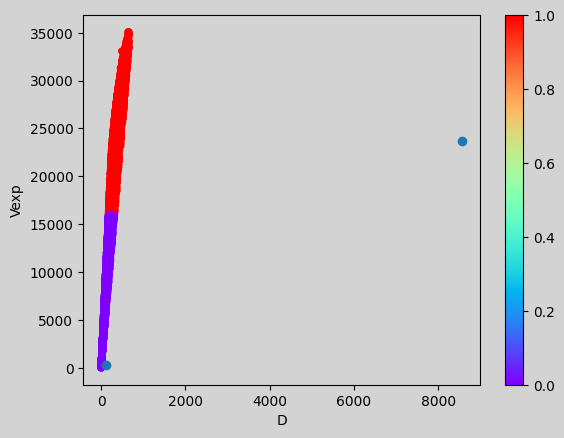

In [60]:
# why are the cluster centers so bad??

%matplotlib inline

X_cluster = galaxy_df[['D','Vexp']].copy()

model = KMeans(n_clusters=2, random_state=42)
model.fit(X_cluster)

# gather the predictions
preds = model.predict(X_cluster)
score = silhouette_score(X_cluster, preds)
centroids = model.cluster_centers_

X_cluster.plot.scatter(x=0, y=1, c=preds, cmap='rainbow')
plt.scatter(centroids[0],centroids[1])
plt.show()